<a href="https://colab.research.google.com/github/Keithleezx123/DSL/blob/main/Copy_of_VerilogGitHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [75]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

The plugin extension is already loaded. To reload it, use:
  %reload_ext plugin


# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [76]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output reg [3:0] count,
    output reg ten
);

//YOUR CODE HERE
always @(posedge clk or posedge rst) begin
    if (rst) begin
        count <= 4'b0000;
        ten <= 1'b0;
    end
    else begin
        if (count == 4'b1001) begin  // When count reaches 9
            count <= 4'b0000;        // Reset to 0
            ten <= 1'b1;            // Set ten flag
        end
        else begin
            count <= count + 1'b1;  // Normal increment
            ten <= 1'b0;           // Clear ten flag
        end
    end
end
endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [3:0] count;
wire ten;

decade_counter decade_counter_u0(
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

always begin
    //YOUR CODE HERE - Generate 20 unit time clock;
    #1 clk = ~clk;
end

initial begin
    //YOUR CODE HERE - Initialize the clk, rst;
    clk = 0;
    rst = 1;
    #3 rst = 0;
    #25
    $finish;
end
initial begin
    $dumpfile("decade_counter.vcd");
    $dumpvars(0, decade_counter_tb);
end
endmodule



VCD info: dumpfile decade_counter.vcd opened for output.



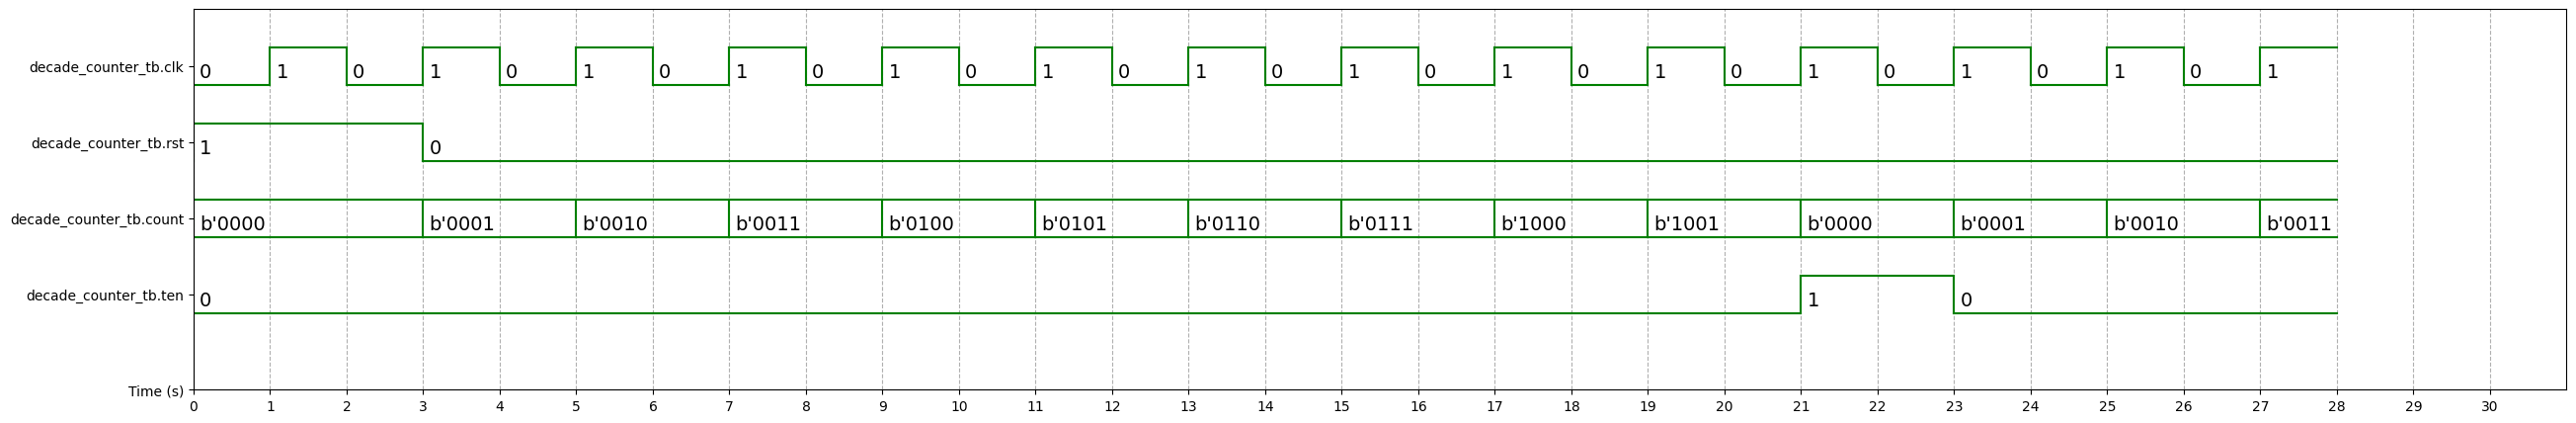

In [77]:
%%waveform decade_counter.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst','decade_counter_tb.count','decade_counter_tb.ten']
time_begin = 0
time_end = 30
base = 'bin' # bin, dec, dec2, hex, octal

6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

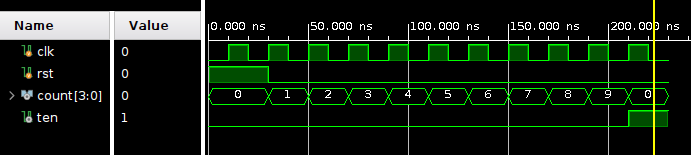

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [78]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer(
    input [1:0]A,
    input [1:0]B,
    input [1:0]C,
    input [1:0]D,
    input [1:0]SEL,
    output reg [1:0]X
);

//YOUR CODE HERE
//TIPS: IN THE VERILOG CASE STATEMENT, YOU HAVE TO LIST ALL CONDITION TO AVIOD ANY AMBIGUOUS STATEMENT;
always @(*) begin
  case(SEL)
    2'b00: X = A;
    2'b01: X = B;
    2'b10: X = C;
    2'b11: X = D;
    default: X = 2'b00;
  endcase
end
endmodule

//TESTBENCH HERE
module multiplexer_tb();
    reg [1:0] A;    // Fixed declaration syntax - removed commas
    reg [1:0] B;
    reg [1:0] C;
    reg [1:0] D;
    reg [1:0] SEL;
    wire [1:0] X;

    multiplexer m1(.A(A), .B(B), .C(C), .D(D), .SEL(SEL), .X(X));

    initial begin
        A = 2'b00;
        B = 2'b01;
        C = 2'b01;
        D = 2'b11;
        SEL = 2'b00;
        #1 SEL = 2'b01;
        #1 SEL = 2'b10;
        #1 SEL = 2'b11;
        #1 $finish;
    end

    initial begin
        $dumpfile("multiplexer_tb.vcd");
        $dumpvars(0, multiplexer_tb);
    end
endmodule


VCD info: dumpfile multiplexer_tb.vcd opened for output.



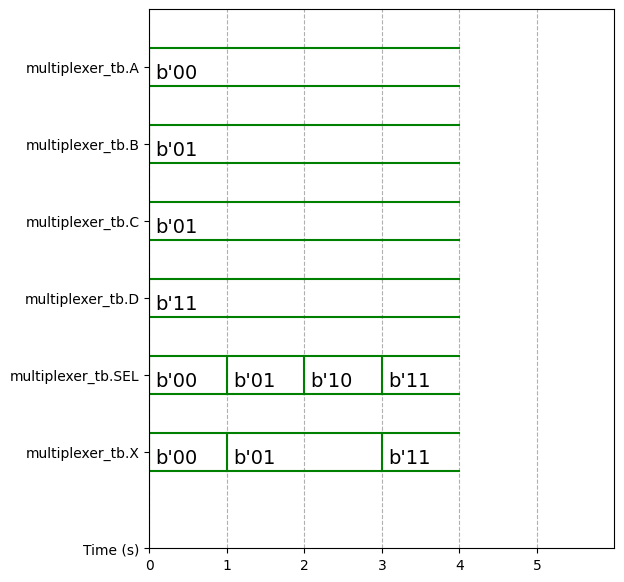

In [79]:
%%waveform multiplexer_tb.vcd
sign_list = ['multiplexer_tb.A', 'multiplexer_tb.B','multiplexer_tb.C','multiplexer_tb.D', 'multiplexer_tb.SEL', 'multiplexer_tb.X']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the multiplexer;

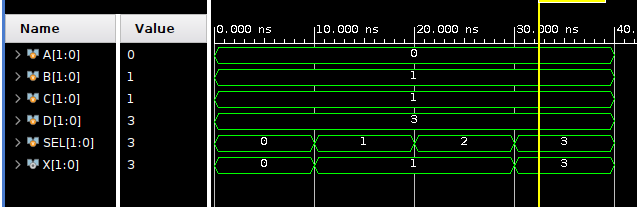

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [90]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module demultiplexer(
    input [1:0]A,
    input [1:0]SEL,
    output reg [1:0]W,
    output reg [1:0]X,
    output reg [1:0]Y,
    output reg [1:0]Z
    );

//YOUR CODE HERE
always @(*) begin
    case(SEL)
        2'b00: begin W=A; X=2'b00; Y=2'b00; Z=2'b00; end
        2'b01: begin W=2'b00; X=A; Y=2'b00; Z=2'b00; end
        2'b10: begin W=2'b00; X=2'b00; Y=A; Z=2'b00; end
        2'b11: begin W=2'b00; X=2'b00; Y=2'b00; Z=A; end  // Fixed syntax: comma -> semicolon
        default: begin W=2'b00; X=2'b00; Y=2'b00; Z=2'b00; end
    endcase
end
endmodule  // Added missing endmodule

//TESTBENCH HERE
module demultiplexer_tb();
    reg [1:0]A;
    reg [1:0]SEL;
    wire [1:0]W;
    wire [1:0]X;
    wire [1:0]Y;
    wire [1:0]Z;

    demultiplexer demultiplexer_inst(.A(A), .SEL(SEL), .W(W), .X(X), .Y(Y), .Z(Z));

    initial begin
        A = 2'b00;    // Fixed: Added semicolons
        SEL = 2'b00;  // Fixed: Added semicolons
        #1 A = 2'b01; SEL = 2'b01;
        #1 SEL = 2'b10;
        #1 SEL = 2'b11; A = 2'b11;  // Fixed: comma -> semicolon
        #1 $finish;
    end

    initial begin
        $dumpfile("demultiplexer_tb.vcd");
        $dumpvars(0,demultiplexer_tb);
    end
endmodule


VCD info: dumpfile demultiplexer_tb.vcd opened for output.



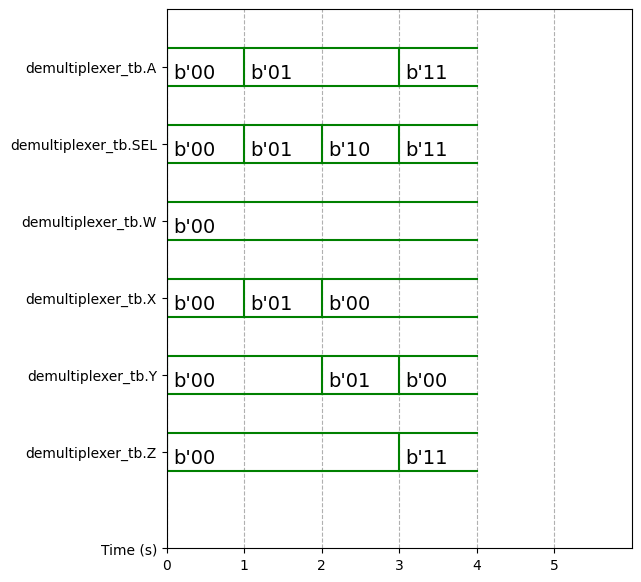

In [91]:
%%waveform demultiplexer_tb.vcd
sign_list = ['demultiplexer_tb.A', 'demultiplexer_tb.SEL','demultiplexer_tb.W','demultiplexer_tb.X', 'demultiplexer_tb.Y', 'demultiplexer_tb.Z']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the demultiplexer;

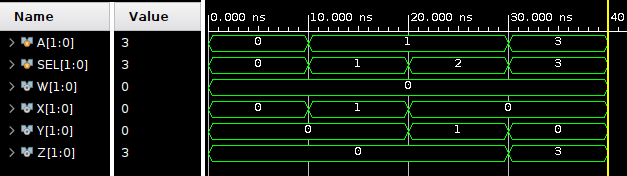

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [123]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module nibbleadd(
    input [7:0]A,
    input [7:0]B,
    input ctrl,
    output reg [4:0]q
);


//YOUR CODE HERE
always @(*) begin
    if (ctrl == 1'b1)
        q = A[7:4] + B[7:4];    // Add upper nibbles
    else
        q = A[3:0] + B[3:0];    // Add lower nibbles
end
endmodule

//TESTBENCH HERE
module nibbleadd_tb;
    // Declare inputs as regs and outputs as wires
    reg [7:0] A;
    reg [7:0] B;
    reg ctrl;
    wire [4:0] q;

    // Instantiate the module
    nibbleadd uut (
        .A(A),
        .B(B),
        .ctrl(ctrl),
        .q(q)
    );

    // Test procedure
    initial begin
        A = 8'h24;
        B = 8'h81;
        ctrl = 1'b0;
        #1 A = 8'h09; B = 8'h63; ctrl = 1'b0;
        #1 A = 8'h0d; B = 8'h8d; ctrl = 1'b0;
        #1 A = 8'h65; B = 8'h12; ctrl = 1'b0;
        #1 A = 8'h01; B = 8'h0d; ctrl = 1'b0;
        #1 A = 8'h76; B = 8'h3d; ctrl = 1'b1;
        #1 A = 8'hed; B = 8'h8c; ctrl = 1'b1;
        #1 A = 8'hf9; B = 8'hc6; ctrl = 1'b1;
        #1 A = 8'hc5; B = 8'haa; ctrl = 1'b1;
        #1 A = 8'he5; B = 8'h77; ctrl = 1'b1;
        #1 A = 8'h12; B = 8'h8f; ctrl = 1'b1;
        #1 $finish;
    end
    initial begin
      $dumpfile("nibbleadd_tb.vcd");
      $dumpvars(0,nibbleadd_tb);
    end
endmodule

VCD info: dumpfile nibbleadd_tb.vcd opened for output.



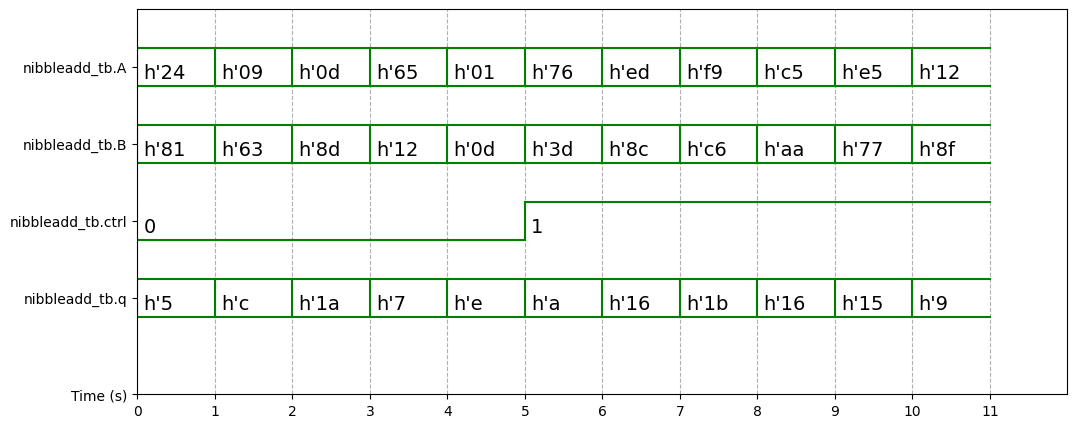

In [124]:
%%waveform nibbleadd_tb.vcd
sign_list = ['nibbleadd_tb.A', 'nibbleadd_tb.B','nibbleadd_tb.ctrl','nibbleadd_tb.q']
time_begin = 0
time_end = 11
base = 'hex' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the nibbleadd;

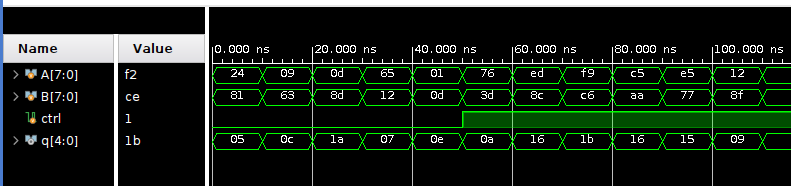

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [120]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module CCTA(
        input [3:0] A,
        input [3:0] B,
        input [3:0] C,
        input rst,
        input ctrl,
        output reg [4:0] q
);

//CodeHERE
always @(*) begin
  if (rst == 1'b1) begin     // Added parentheses, fixed 'then' to begin
      q <= 5'b0;            // Specified width explicitly (good practice)
  end
  else if (ctrl == 1'b0) begin  // Added 'begin' and proper if-else structure
      q <= A + B;
  end
  else begin
      q <= A - C;
  end
end
endmodule

//TESTBENCH
module CCTA_tb;

    // Declare testbench variables
    reg [3:0] A;
    reg [3:0] B;
    reg [3:0] C;
    reg rst;
    reg ctrl;
    wire [4:0] q;

    // Instantiate the CCTA module
    CCTA uut (
        .A(A),
        .B(B),
        .C(C),
        .rst(rst),
        .ctrl(ctrl),
        .q(q)
    );

    // Test procedure
    initial begin
        // Initialize inputs
        A = 4'h4;
        B = 4'h1;
        C = 4'h9;
        rst = 1;
        ctrl = 0;
        #1 rst = 0;
        #1 A = 4'h3; B = 4'hd; C = 4'hd;
        #1 A = 4'h5; B = 4'h2; C = 4'h1;
        #1 A = 4'hd; B = 4'h6; C = 4'hd;
        #1 A = 4'hd; B = 4'hc; C = 4'h9;
        #1 A = 4'h6; B = 4'h5; C = 4'ha; ctrl =1;
        #1 A = 4'h5; B = 4'h7; C = 4'h2;
        #1 A = 4'hf; B = 4'h2; C = 4'he;
        #1 A = 4'h8; B = 4'h5; C = 4'hc;
        #1 A = 4'hd; B = 4'hd; C = 4'h5;
        #1 A = 4'h3; B = 4'ha; C = 4'h0;
    end

    // Monitor outputs
    initial begin
        $dumpfile("CCTA_tb.vcd");
        $dumpvars(0, CCTA_tb);
    end

endmodule

VCD info: dumpfile CCTA_tb.vcd opened for output.



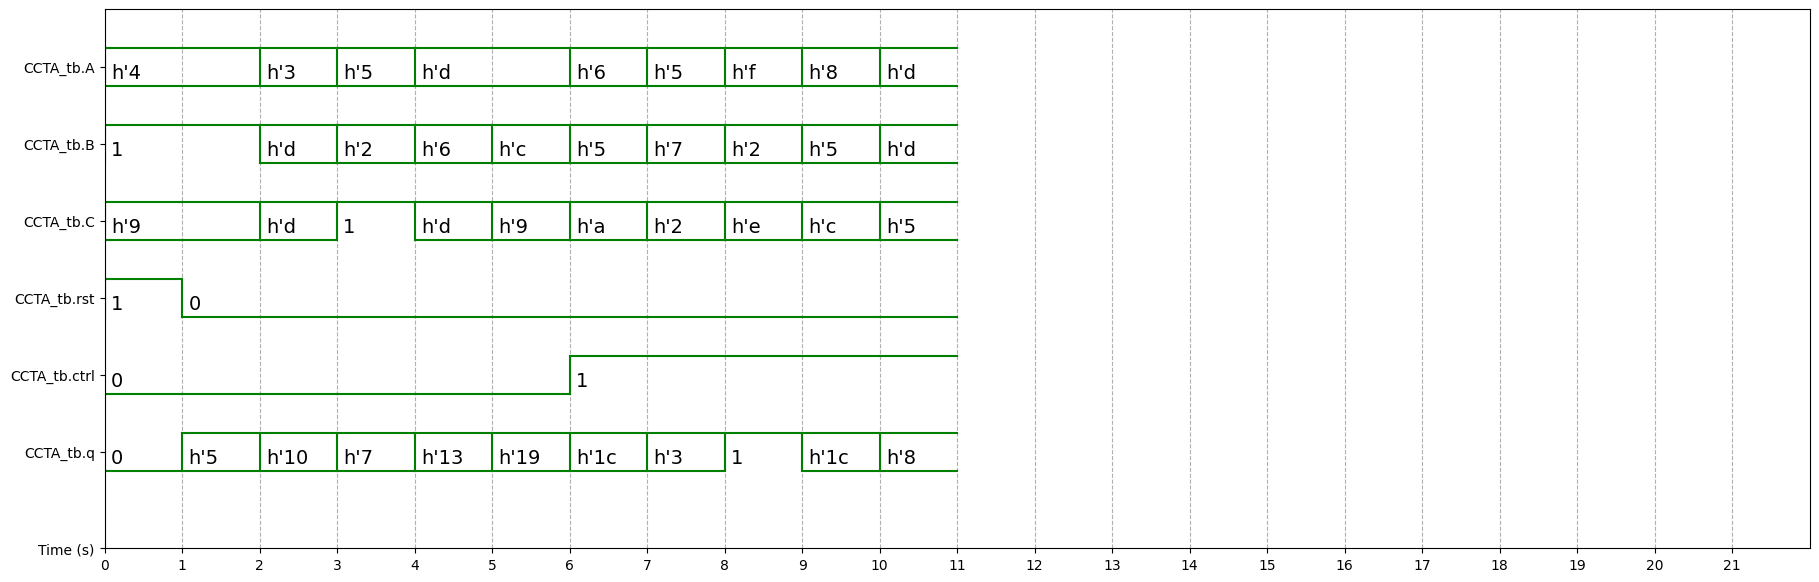

In [122]:
%%waveform CCTA_tb.vcd
sign_list = ['CCTA_tb.A', 'CCTA_tb.B','CCTA_tb.C','CCTA_tb.rst', 'CCTA_tb.ctrl', 'CCTA_tb.q']
time_begin = 0
time_end = 21
base = 'hex' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the CCTA;

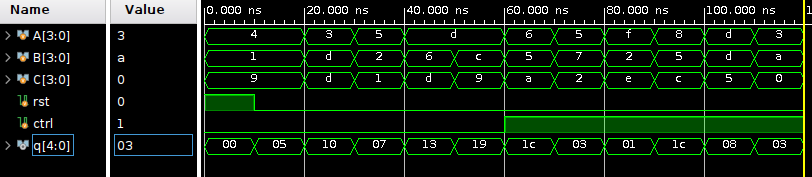